In [3]:
import pandas as pd

In [4]:
df= pd.read_csv("Obesity.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [6]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

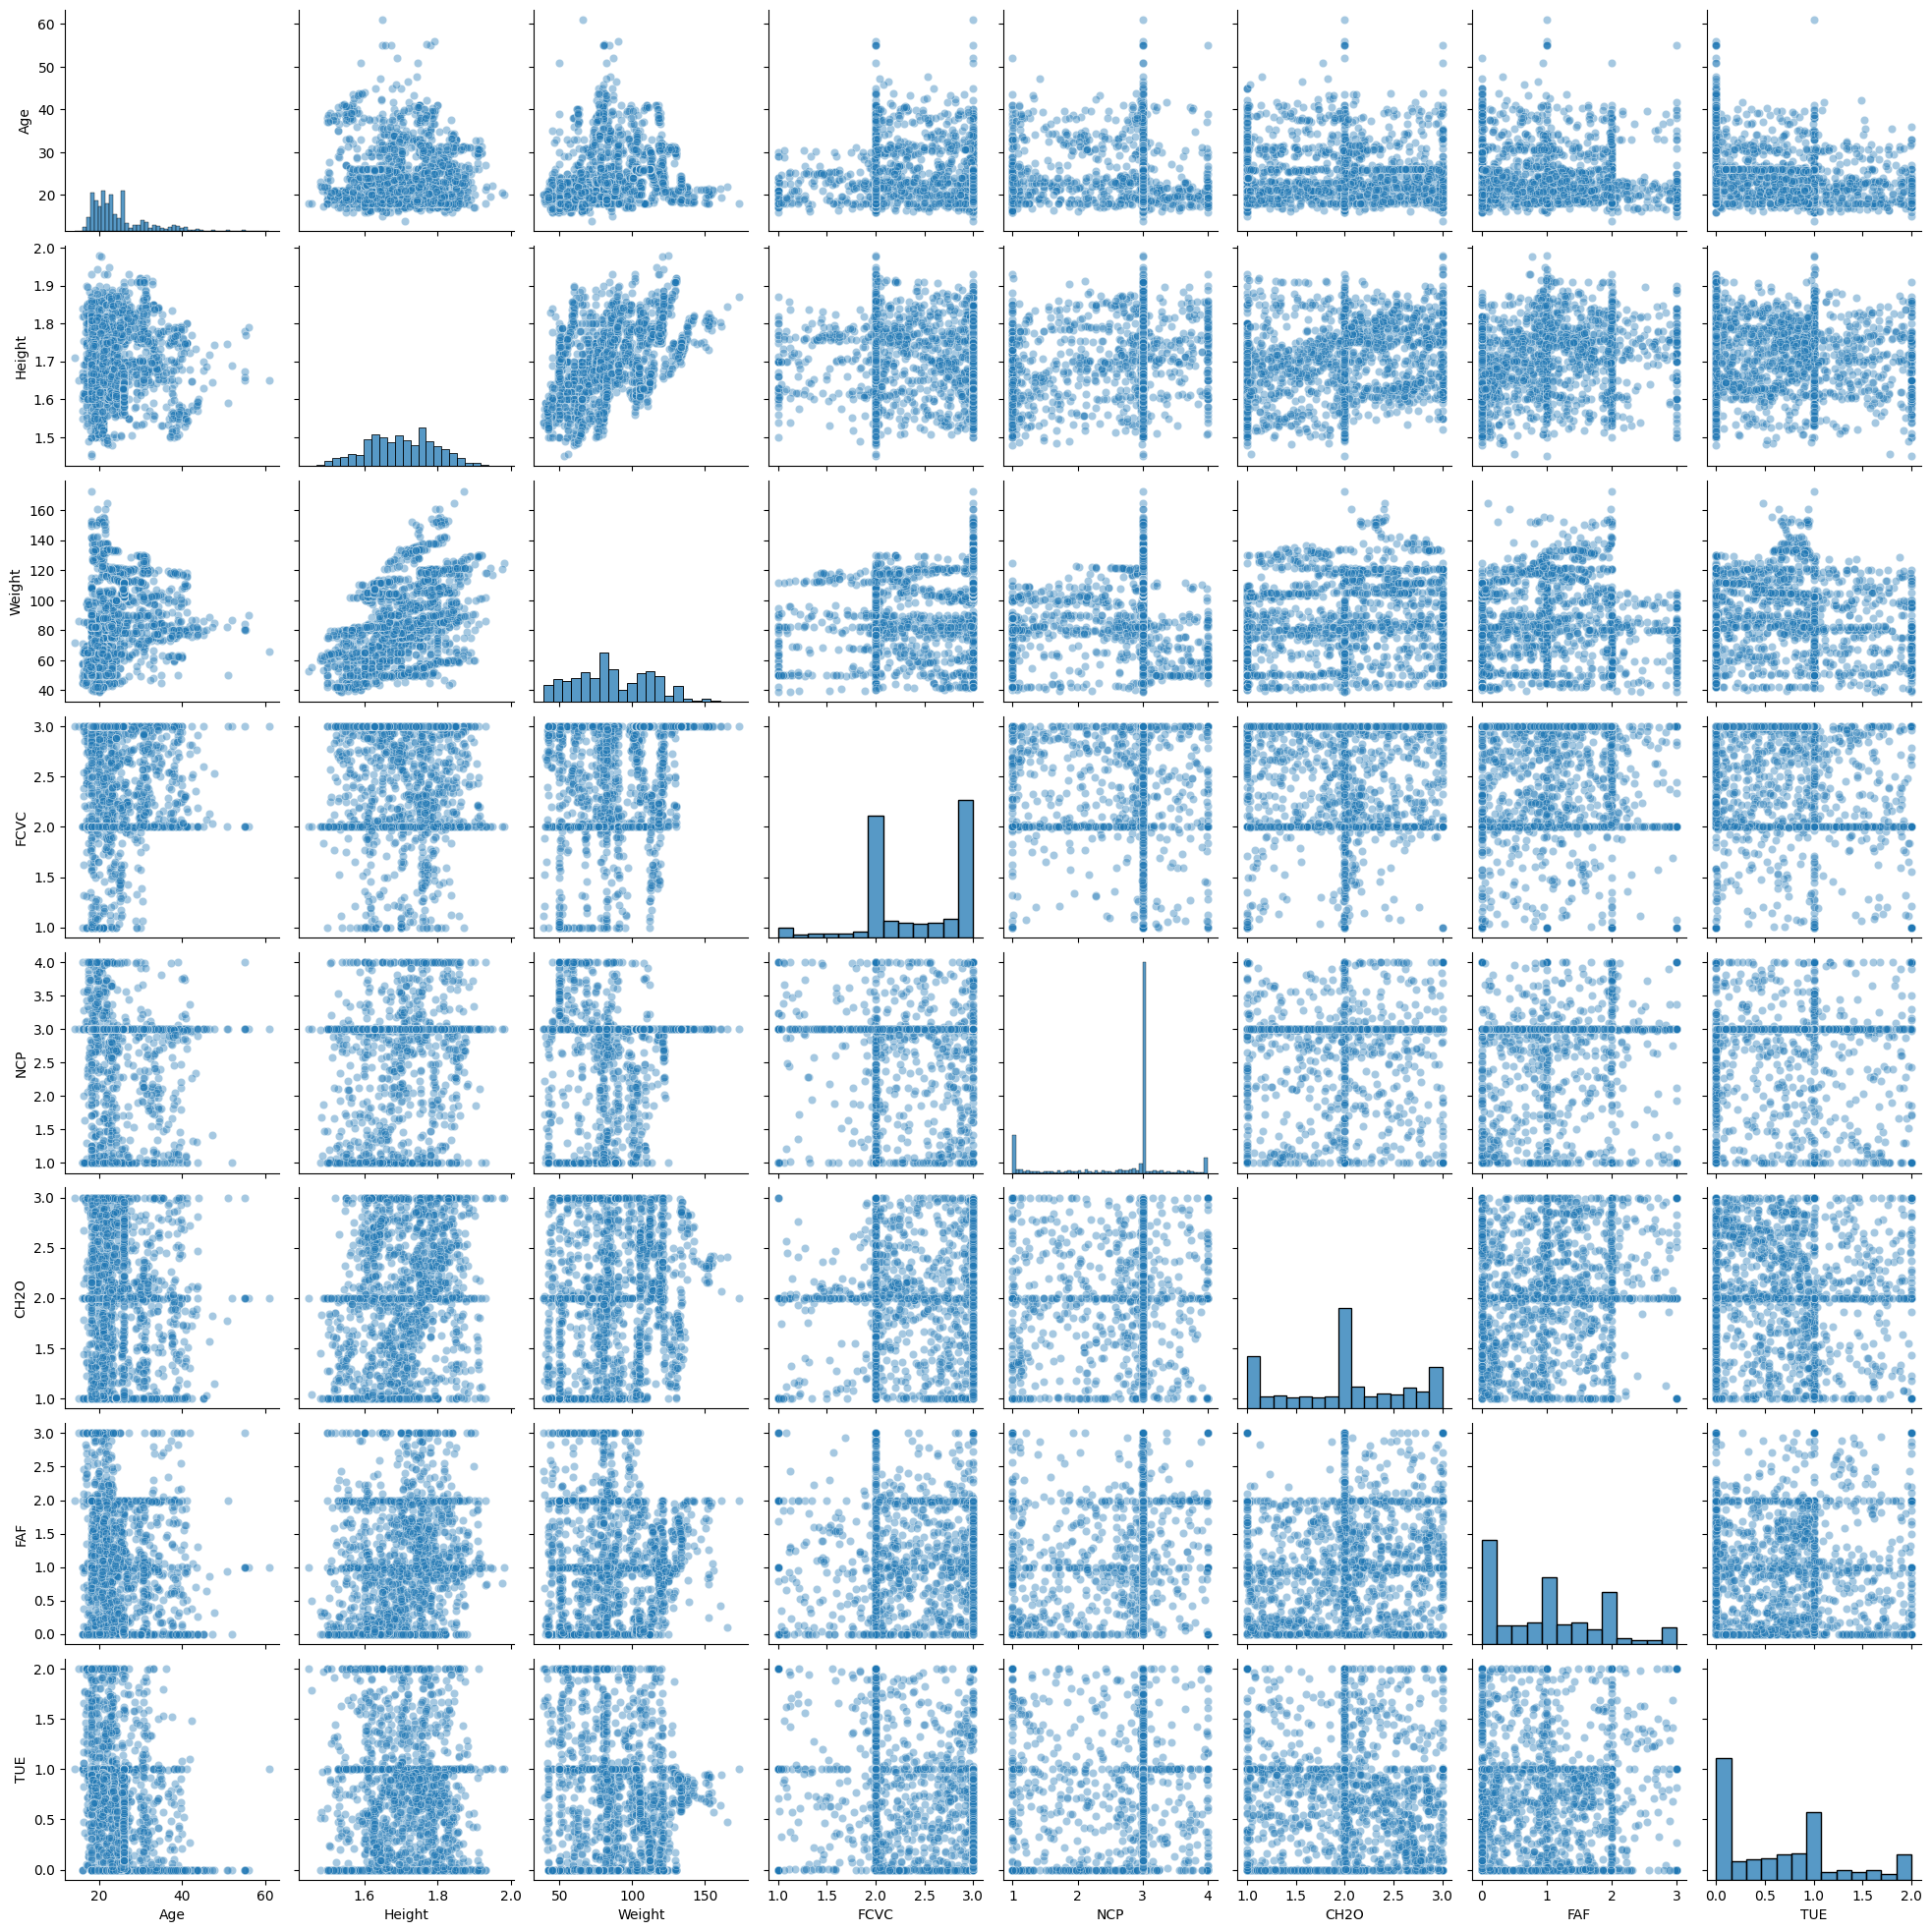

In [7]:
import seaborn as sns
sns.pairplot(df, kind="scatter", plot_kws={'alpha':0.4})

In [5]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

features = ['Height', 'Weight', 'NCP', 'FAF']
target = 'NObeyesdad'

subset_data = df[features + [target]]

label_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
subset_data['target'] = subset_data[target].map(label_map)

X = subset_data[features]
y = subset_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred, target_names=label_map.keys()))


Accuracy: 0.88
                     precision    recall  f1-score   support

Insufficient_Weight       0.86      1.00      0.93        56
      Normal_Weight       0.94      0.74      0.83        62
 Overweight_Level_I       0.77      0.86      0.81        56
Overweight_Level_II       0.89      0.80      0.84        50
     Obesity_Type_I       0.92      0.83      0.87        78
    Obesity_Type_II       0.83      0.91      0.87        58
   Obesity_Type_III       0.94      1.00      0.97        63

           accuracy                           0.88       423
          macro avg       0.88      0.88      0.87       423
       weighted avg       0.88      0.88      0.88       423



C:\Users\shiko\AppData\Local\Temp\ipykernel_9020\115133984.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['target'] = subset_data[target].map(label_map)


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

features = ['Height', 'Weight', 'NCP', 'FAF']
target = 'NObeyesdad'

subset_data = df[features + [target]]

label_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
subset_data['target'] = subset_data[target].map(label_map)

X = subset_data[features]
y = subset_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.22
R^2 Score: 0.94


C:\Users\shiko\AppData\Local\Temp\ipykernel_9020\1701179901.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['target'] = subset_data[target].map(label_map)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

features = ['Height', 'Weight', 'NCP', 'FAF']
target = 'NObeyesdad'

subset_data = df[features + [target]]

label_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

unexpected_values = set(subset_data[target]) - set(label_map.keys())
if unexpected_values:
    raise ValueError(f"Unexpected values in target variable: {unexpected_values}")

subset_data['target'] = subset_data[target].map(label_map)

X = subset_data[features]
y = subset_data['target']

model = LinearRegression()
model.fit(X, y)

def predict_obesity_level(height, weight, ncp, faf, model):
    # Prepare input features as a DataFrame
    input_data = pd.DataFrame({
        'Height': [height],
        'Weight': [weight],
        'NCP': [ncp],
        'FAF': [faf]
    })
    
    predicted_level = model.predict(input_data)
    
    return predicted_level[0]  

if __name__ == "__main__":
    height = float(input("Enter Height (in cm): "))
    weight = float(input("Enter Weight (in kg): "))
    ncp = float(input("Enter Number of Main Meals per Day: "))
    faf = float(input("Enter Physical Activity Frequency: "))
    
    predicted_level = predict_obesity_level(height, weight, ncp, faf, model)
    
    label_map_reverse = {v: k for k, v in label_map.items()}
    predicted_category = label_map_reverse[int(predicted_level)]
    
    
    print(f"Predicted Obesity Level Category: {predicted_category}")
